In [40]:
import pandas as pd
data=pd.read_csv("C:\\Users\\Bimal gupta\\Desktop\\a.csv")
data.shape

(16, 2)

In [41]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 0)

In [38]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((9, 1), (7, 1), (9,), (7,))

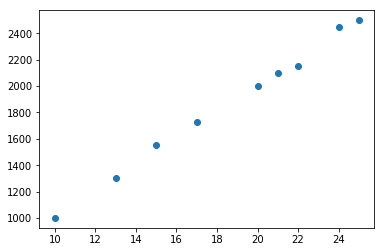

In [44]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)
plt.show()

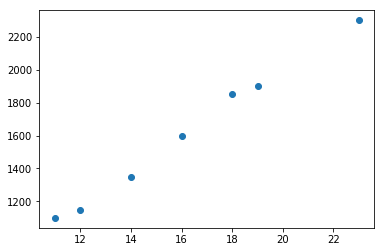

In [45]:
plt.scatter(X_test,y_test)
plt.show()

In [46]:
cur_error = []
def hypothesis(theta,X_train):
    return theta[0] + theta[1]*X_train

In [47]:
def error(X_train,y_train,theta):
    total_error = 0
    No_entry = X_train.shape[0]
    
    for i in range(No_entry):
        total_error += (y_train[i] - hypothesis(theta,X_train[i]))**2
    
    return 0.5*total_error

In [53]:
import numpy as np
def gradient(y_train,X_train,theta):
    grad = np.array([0.0,0.0])
    No_entry = X_train.shape[0]
    for i in range(No_entry):
        grad[0] += -1*(y_train[i] - hypothesis(theta,X_train[i]))
        grad[1] += -1*(y_train[i] - hypothesis(theta,X_train[i]))*X_train[i]        
    return grad

In [54]:
def gradientDescent(X_train,Y_train,learning_rate,maxItr):
    grad = np.array([0.0,0.0])
    theta = np.array([0.0,0.0])
    error_start = []
    
    for i in range(maxItr):
        grad = gradient(y_train,X_train,theta)
        current_error = error(X_train,y_train,theta)
        cur_error.append(current_error)
        print("Current Error= %.2f"%current_error)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        error_start.append(current_error)
    return theta,error_start

In [57]:
theta,final_error = gradientDescent(X_train,y_train,learning_rate=0.0001,maxItr=30)
print(theta[0],theta[1])

Current Error= 16676562.50
Current Error= 7449296.79
Current Error= 3328700.16
Current Error= 1488575.79
Current Error= 666836.11
Current Error= 299873.91
Current Error= 136000.53
Current Error= 62820.00
Current Error= 30139.96
Current Error= 15546.11
Current Error= 9028.97
Current Error= 6118.63
Current Error= 4818.96
Current Error= 4238.56
Current Error= 3979.38
Current Error= 3863.63
Current Error= 3811.93
Current Error= 3788.85
Current Error= 3778.53
Current Error= 3773.92
Current Error= 3771.86
Current Error= 3770.94
Current Error= 3770.52
Current Error= 3770.33
Current Error= 3770.25
Current Error= 3770.20
Current Error= 3770.18
Current Error= 3770.17
Current Error= 3770.16
Current Error= 3770.15
5.077473444239196 100.12861632798122


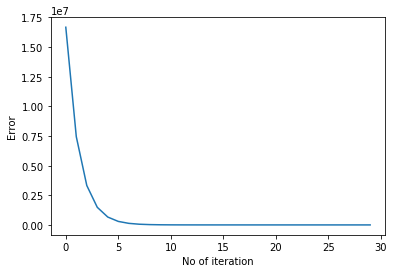

In [58]:
plt.plot(final_error)
plt.xlabel("No of iteration")
plt.ylabel("Error")
plt.show()

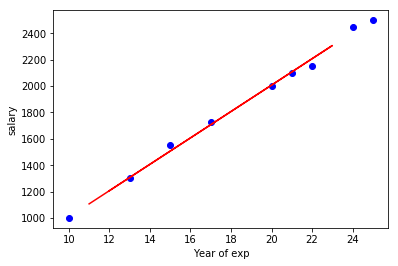

In [59]:
plt.scatter(X_train,y_train,color = 'blue')
plt.plot(X_test,hypothesis(theta,X_test),color='r')
plt.xlabel("Year of exp")
plt.ylabel("salary")
plt.show()

In [60]:
from sklearn.metrics import r2_score
print("R-Square result: %.2f" %r2_score(hypothesis(theta,X_test),y_test))

R-Square result: 0.99
